In [26]:
%matplotlib inline

In [24]:
import cv2
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
def save_zipped_pickle(obj, file_path, protocol=-1):
    with gzip.open(file_path, 'wb') as f:
        pickle.dump(obj, f, protocol)

In [21]:
def load_zipped_pickle(file_path):
    with gzip.open(file_path, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [4]:
def transform_image_path(df, pos):
    df.iloc[:, 0] = 'data/interim/' + pos + '/img/' + df.iloc[:, 0].str.split('/').str[-1]
    df.rename(columns={df.columns[0]: 'img_path'}, inplace=True)
    return df

In [5]:
logs = [(0, '../data/raw/sample/driving_log.csv'),
        (None, '../data/raw/sim_track_1_direction_default/driving_log.csv'),
        (None, '../data/raw/sim_track_1_direction_reverse/driving_log.csv'),
        (None, '../data/raw/sim_track_2_direction_default/driving_log.csv'),
        (None, '../data/raw/sim_track_2_direction_reverse/driving_log.csv')]

In [6]:
save_folder = '../data/interim'

In [7]:
!mkdir -p /src/repos/udacity_carnd/project_3/data/interim/center/img
!mkdir -p /src/repos/udacity_carnd/project_3/data/interim/left/img
!mkdir -p /src/repos/udacity_carnd/project_3/data/interim/right/img

In [8]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
df = pd.DataFrame(columns=columns)

for header, log_path in logs:
    df_temp = pd.read_csv(log_path, header=header, names=columns)
    
    if header == 0:
        df_temp.iloc[:, 0] = '/home/adrian/repos/udacity_carnd/project_3/data/raw/sample/' + df_temp.iloc[:, 0]
    
    df = df.append(df_temp)

In [9]:
 df['center'].sample(10)

5412    /home/adrian/repos/udacity_carnd/project_3/dat...
2116    /home/adrian/repos/udacity_carnd/project_3/dat...
8       /home/adrian/repos/udacity_carnd/project_3/dat...
2682    /home/adrian/repos/udacity_carnd/project_3/dat...
317     /home/adrian/repos/udacity_carnd/project_3/dat...
637     /home/adrian/repos/udacity_carnd/project_3/dat...
1302    /home/adrian/repos/udacity_carnd/project_3/dat...
1399    /home/adrian/repos/udacity_carnd/project_3/dat...
612     /home/adrian/repos/udacity_carnd/project_3/dat...
314     /home/adrian/repos/udacity_carnd/project_3/dat...
Name: center, dtype: object

In [10]:
df_center = df[['center', 'steering']]
df_left = df[['left', 'steering']]
df_right = df[['right', 'steering']]

In [11]:
df_center = transform_image_path(df_center[:], 'center')
df_left = transform_image_path(df_left[:], 'left')
df_right = transform_image_path(df_right[:], 'right')

In [12]:
df_center.sample(5)

,img_path,steering
1466,data/interim/center/img/center_2017_05_18_02_4...,0.198901
4765,data/interim/center/img/center_2016_12_01_13_4...,-0.211667
1612,data/interim/center/img/center_2016_12_01_13_3...,-0.287622
2219,data/interim/center/img/center_2016_12_01_13_3...,0.000000
881,data/interim/center/img/center_2017_05_18_01_2...,-0.022100


In [13]:
df_left.sample(5)

,img_path,steering
1054,data/interim/left/img/left_2017_05_18_01_37_45...,-0.004420
3463,data/interim/left/img/left_2016_12_01_13_38_29...,0.000000
2361,data/interim/left/img/left_2017_05_18_01_39_54...,0.017680
4799,data/interim/left/img/left_2016_12_01_13_41_13...,-0.135712
939,data/interim/left/img/left_2017_05_18_02_49_07...,-0.207741


In [14]:
df_right.sample(5)

,img_path,steering
7808,data/interim/right/img/right_2016_12_01_13_46_...,-0.088240
6076,data/interim/right/img/right_2016_12_01_13_43_...,0.463638
978,data/interim/right/img/right_2016_12_01_13_34_...,0.000000
1191,data/interim/right/img/right_2016_12_01_13_34_...,-0.278127
749,data/interim/right/img/right_2016_12_01_13_33_...,-0.221161


In [15]:
df_center.to_csv('/src/repos/udacity_carnd/project_3/data/interim/center/driving_log.csv',
                 index=False)

In [16]:
df_left.to_csv('/src/repos/udacity_carnd/project_3/data/interim/left/driving_log.csv',
               index=False)

In [17]:
df_right.to_csv('/src/repos/udacity_carnd/project_3/data/interim/right/driving_log.csv',
                index=False)

In [18]:
for src, dst in zip(df['center'], df_center['img_path']):
    source_path = src.replace('/home/adrian', '/src')
    save_path = '/src/repos/udacity_carnd/project_3/' + dst
    
    img = cv2.imread(source_path, cv2.COLOR_BGR2RGB)
    img = img[60:140, :, :]

    save_zipped_pickle(img, save_path)
    

In [19]:
path_to_image_to_check = '/src/repos/udacity_carnd/project_3/data/interim/center/img/center_2016_12_01_13_30_48_287.jpg'

In [22]:
image_to_check = load_zipped_pickle(path_to_image_to_check)

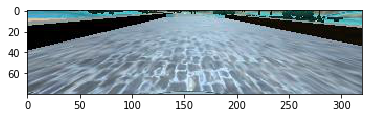

In [27]:
plt.imshow(image_to_check)